In [1]:
# Arbiter, what are you doing here?
import nltk
from nltk.corpus import stopwords
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/ML/python/data/arbiter.csv',delimiter=',')
df.isnull().sum()
df.duplicated().sum()

114

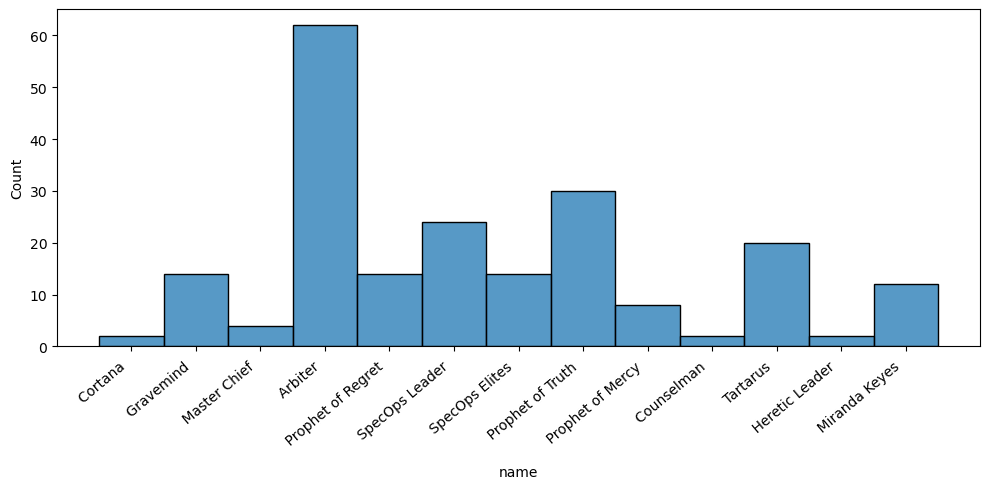

In [2]:

df['name'].drop_duplicates(inplace=True)

fig, axs = plt.subplots(figsize=(10,5)) 
sns.histplot(x='name',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

In [3]:
#cortana spoke less than chief
#I have to give shoutouts to halo every here and then
#Halo is the reason I started all of this programming stuff, so respect

df['line'] = df['line'].str.lower()
df['name'] =df['name'].str.lower()

import string
PUNC = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans("","",PUNC))


print(df['line'])

0             [after seeing gravemind]  what... is that?
1               i... i am a monument to all your sins...
2             relax. i'd rather not piss this thing off.
3                                                 demon!
4       this one is machine and nerve and has its min...
                             ...                        
203                                   nothing ever will.
204     you are the arbiter. the will of the prophets...
205                                that makes two of us.
206     the council decided to have y' hung by your e...
207                                   i am already dead.
Name: line, Length: 208, dtype: object


In [4]:
df['line'] = df['line'].str.replace("\d","")
df['line'] = df['line'].str.replace("[^\w\s]","")


print(df['line'])

0                   after seeing gravemind  what is that
1                     i i am a monument to all your sins
2                relax id rather not piss this thing off
3                                                  demon
4       this one is machine and nerve and has its min...
                             ...                        
203                                    nothing ever will
204     you are the arbiter the will of the prophets ...
205                                 that makes two of us
206     the council decided to have y hung by your en...
207                                    i am already dead
Name: line, Length: 208, dtype: object


In [5]:
from nltk.tokenize import word_tokenize
sw = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    return ' '.join(filtered_tokens)

df['line'] = df['line'].apply(remove_stopwords)
print(df['line'])


0                                       seeing gravemind
1                                          monument sins
2                             relax id rather piss thing
3                                                  demon
4      one machine nerve mind concluded one flesh fai...
                             ...                        
203                                         nothing ever
204                 arbiter prophets elites lives matter
205                                         makes two us
206    council decided hung entrails corpse paraded c...
207                                         already dead
Name: line, Length: 208, dtype: object


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


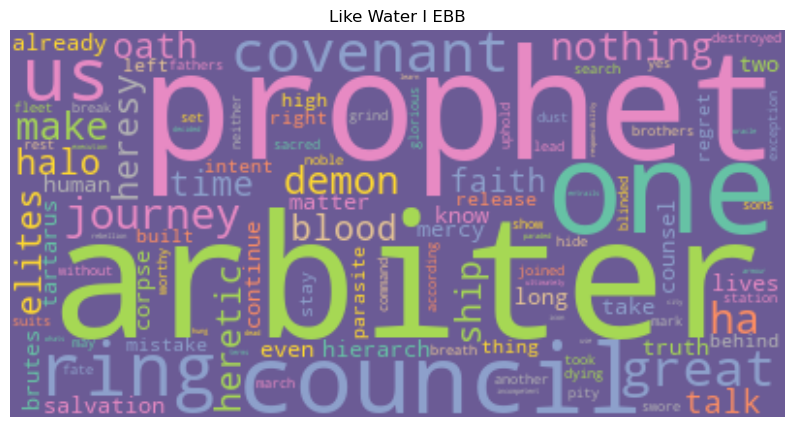

In [6]:
from wordcloud import WordCloud


nltk.download("omw-1.4")
nltk.download("wordnet")



text = " ".join(i for i in df.line)

wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Like Water I EBB")
plt.show()

In [7]:
print(text.count("arbiter"))
print(text.count("prophet"))
print(text.count("council"))
print(text.count("covenant"))
print(text.count("ring"))

38
30
14
12
20


In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer()


from sklearn.model_selection import train_test_split
X = df['line']
X = cv.fit_transform(X).toarray()
y = df['name']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)




from sklearn.naive_bayes import GaussianNB,MultinomialNB
GNB = GaussianNB()
MNB = MultinomialNB()


from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
PC = PassiveAggressiveClassifier()
lr = LogisticRegression()

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --Clf Rpt-- {clf_rpt}')
    return pred




GNB_pred = evaluate_model(X_train, X_test, y_train, y_test, GNB)
PC_pred = evaluate_model(X_train, X_test, y_train, y_test, PC)
lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)

GaussianNB, --ACC-- 80.95%; --Clf Rpt--                         precision    recall  f1-score   support

              arbiter        0.86      0.86      0.86        14
           counselman        1.00      1.00      1.00         1
            gravemind        1.00      1.00      1.00         4
       heretic leader        1.00      1.00      1.00         1
         master chief        1.00      1.00      1.00         1
        miranda keyes        0.50      1.00      0.67         2
     prophet of mercy        1.00      1.00      1.00         1
    prophet of regret        0.50      1.00      0.67         1
     prophet of truth        1.00      1.00      1.00         4
       specops elites        0.75      1.00      0.86         3
       specops leader        0.60      0.75      0.67         4
             tartarus        1.00      0.17      0.29         6

              accuracy                           0.81        42
             macro avg       0.85      0.90      0.83        4

<Axes: title={'center': 'Confusion Matrix for GaussianNB'}>

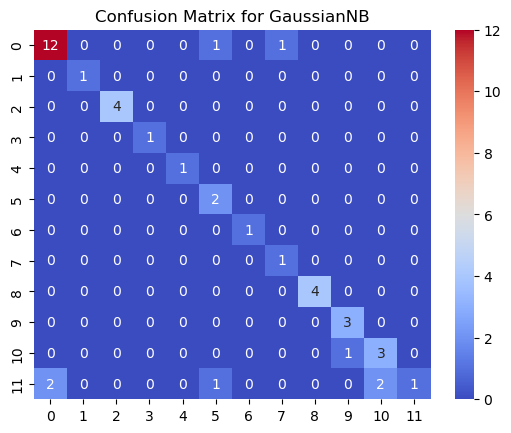

In [9]:
#this worked way better than lemmatization or stemming.
#stemming was alful. Stemming is always terrible with detecting names
# because stemming cuts the names down, so 'arbiter' stemmed is 'arbit'
def confusion_matrix_(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    con = confusion_matrix(y_test,pred)
    heatmap = sns.heatmap(con,annot=True,fmt="d",cmap="coolwarm")
    heatmap.set_title(f'Confusion Matrix for {model.__class__.__name__}')
    return heatmap

confusion_matrix_(X_train, X_test, y_train, y_test, GNB)


<Axes: title={'center': 'Confusion Matrix for PassiveAggressiveClassifier'}>

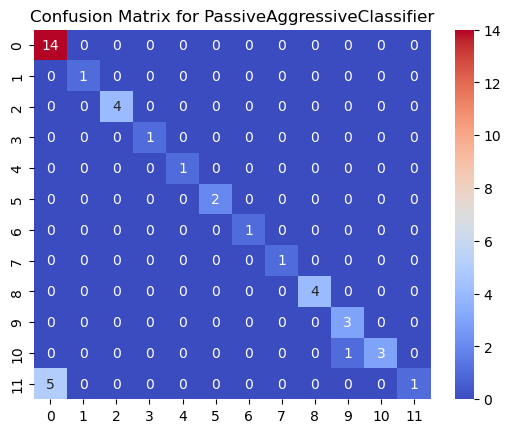

In [10]:
confusion_matrix_(X_train, X_test, y_train, y_test, PC)

<Axes: title={'center': 'Confusion Matrix for LogisticRegression'}>

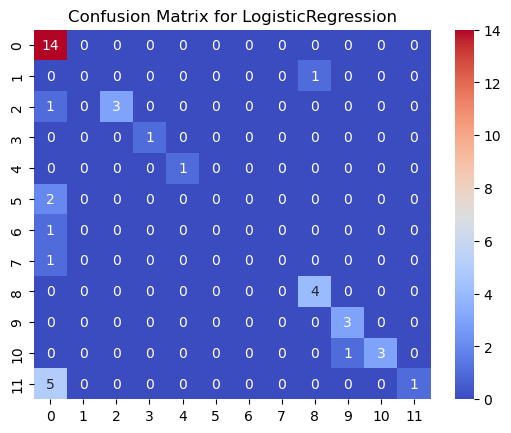

In [11]:
confusion_matrix_(X_train, X_test, y_train, y_test, lr)

<Axes: title={'center': 'Confusion Matrix for MultinomialNB'}>

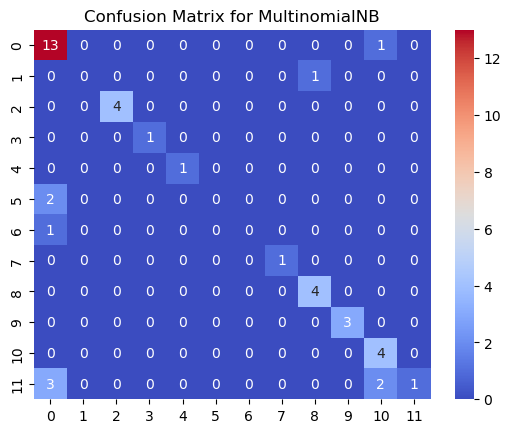

In [12]:
confusion_matrix_(X_train, X_test, y_train, y_test, MNB)